# Predictions and Maximum Likelihood of Poisson Random Variables

Maximizing likelihoods for a Poisson random variable in order to model data and make predictions. Note that the negative log likelihood for a Poisson random variable is given by

$$\ell(\lambda; \mathbf{y}) = -\sum_{i=1}^N\Bigg(   y_{i}\cdot \ln(\lambda) - \lambda - \ln(y_i!) \Bigg)$$

Here, $\mathbf{y}$ is a vector of counts and $\lambda$ is a scalar value.

In [1]:
#Start by importing relevant packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
from scipy.special import gammaln
from sklearn import linear_model
from IPython.display import display
import math

In [2]:
#define a function which computes the negative log likelihood for a Poisson random variable given an input number of counts and lambda value
def poissonNegLogLikelihood(lam,y):
    

    neg_log_lik = -np.sum(y*np.log(lam)-lam)
    return neg_log_lik



In [3]:
#define a function returning the negative log likelihood given an input vector of counts, a design matrix, and a vector of model parameters
#assume that each element of the counts vector is independent and follows a Poisson distribution

#use the function written in the cell above
def poissonRegressionNegLogLikelihood(b, X, y):
    #Enter the expression for lambda as shown above!
    lam = np.exp(X@b)
    # Use poissonNegLogLikelihood to compute the likelihood
    neg_log_lik = poissonNegLogLikelihood(lam,y)
    return neg_log_lik

In [4]:
#now create a function which will accept an input vector of parameters and design matrix and return a prediction based on the
#model function: y_hat=exp(X@b)
def modelPrediction(b,X):
    yhat = np.exp(X@b)
    return yhat

In [5]:
#now create a function which will fit a model to a data set for a Poisson random variable given the input design matrix and corresponding response vector
def fitModel(X,y):

    # Instantiate a guess for the betas, beta_start, so that the optimizer has somewhere to start
    # Keep in mind what shape the beta_start should be. It shoud have the same number of elements as X as columns
    ncols=X.shape[1]
    beta_start = np.zeros((ncols,1))
    # Minimize the appropriate likelihood function
    mle=minimize(poissonRegressionNegLogLikelihood, beta_start, args=(X,y), method="Powell", tol=1e-8)
    # Extract the maximum likelihood estimates from the optimizer.
    betas = mle.x
    return betas

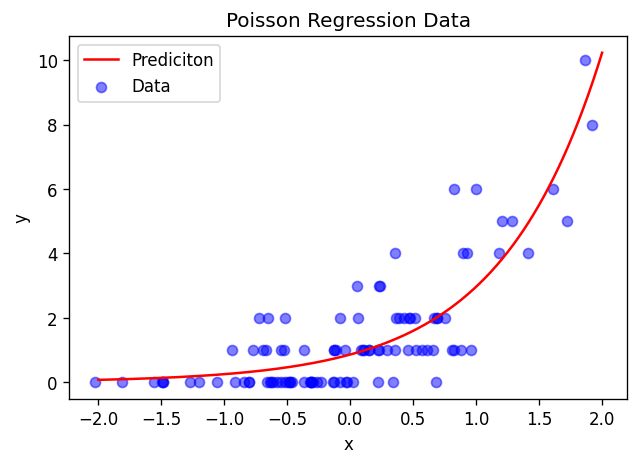

In [8]:
#load in a test data set and fit!

# Loading in the data.  
df = pd.read_csv("poisson_regression_data.csv")
df.head()

fig, ax = plt.subplots(dpi = 120)


# Scatterplot the data. 
plt.scatter(df.x, df.y, label="Data", color="blue", alpha=0.5)

# Fit the model.  Use your functions.  
x = df.x.values 
X = np.c_[np.ones(shape=(len(x),)),x]
y= df.y.values


# Find the maximum likelihood estimates for the coefficients for this data
betas = fitModel(X,y)
# Make predictions on new data
newx = np.linspace(-2,2,1001)
newX = np.c_[np.ones(shape=(len(newx),)),newx]

# Make predictions on the new data
y_predicted=modelPrediction(betas, newX)

#Finally, plot the predictions on the same axis and color the predictions red
plt.plot(newx, y_predicted, label="Prediciton", color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Poisson Regression Data")
plt.legend()
plt.show()

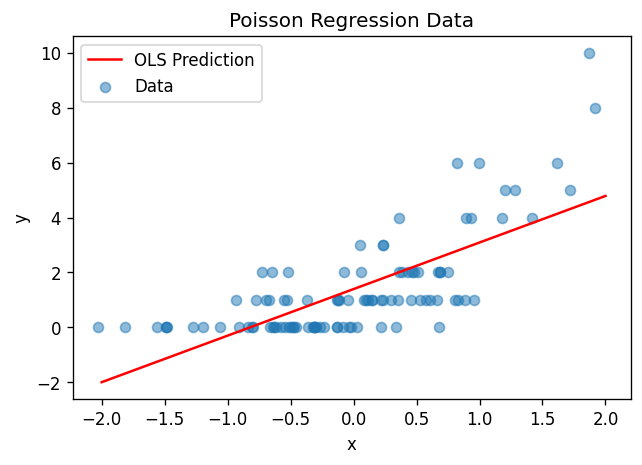

In [9]:
#compare the above model to a fit obtained using ordinary least squares regression
# Read in the data
df = pd.read_csv('poisson_regression_data.csv')
x=df.iloc[:,0].values.reshape(-1,1) #the first column
y=df.iloc[:,1].values.reshape(-1,1) #the second column

# fit the model

# I am going to use sklearn.linear_module.LinearRegression() in order to implement this OLS fit
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Create the linear regression object
regression=linear_model.LinearRegression()

# Train the model
regression.fit(x,y)

# Make predictions over the range -2 to 2
x_test=np.linspace(-2,2,len(x)).reshape(-1,1)
y_pred=regression.predict(x_test)

# Plot a scatter plot of the data and your model's predictions
fig, ax = plt.subplots(dpi = 120)
plt.scatter(x,y, alpha=0.5, label="Data")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Poisson Regression Data")
plt.plot(x_test,y_pred, color='red', label="OLS Prediction")
plt.legend()
plt.show()


